Importing necessary libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Reading Dataset inta a dataframe

In [ ]:
df = pd.read_csv("house_price.csv").set_index("DATE")

In [ ]:
df.head()

hpi  year  month           gdp  unemp_rate  \
DATE                                                         
2000-01-01  100.551  2000      1  49335.000000         4.0   
2000-02-01  101.339  2000      2  49593.000000         4.1   
2000-03-01  102.127  2000      3  49851.000000         4.0   
2000-04-01  102.922  2000      4  50109.000000         3.8   
2000-05-01  103.678  2000      5  50080.666667         4.0   

            completed_housing_unit    cpi  total_house_cons   ppic  \
DATE                                                                 
2000-01-01                    1574  169.3            784940  144.1   
2000-02-01                    1677  170.0            793737  144.7   
2000-03-01                    1704  171.0            809459  145.4   
2000-04-01                    1610  170.9            804766  145.6   
2000-05-01                    1682  171.2            805005  144.9   

            population  monthly_house_supply  income  fed_interest_rate  \
DATE                                                                      
2000-01-01      281083                   4.3  9799.9               5.45   
2000-02-01      281299                   4.3  9837.9               5.73   
2000-03-01      281531                   4.3  9864.0               5.85   
2000-04-01      281763                   4.4  9913.7               6.02   
2000-05-01      281996                   4.4  9954.5               6.27   

            avg_mortgage  total_households  median_house_income  subsidies  \
DATE                                                                         
2000-01-01        8.2100            104705              67470.0      19.69   
2000-02-01        8.3250            104705              67470.0      19.69   
2000-03-01        8.2400            104705              67470.0      19.69   
2000-04-01        8.1525            104705              67470.0      19.69   
2000-05-01        8.5150            104705              67470.0      19.69   

            old_age_pop  
DATE                     
2000-01-01     12.31763  
2000-02-01     12.31763  
2000-03-01     12.31763  
2000-04-01     12.31763  
2000-05-01     12.31763

 Exploratory Data Analysis(EDA)


Summary Statistics :

In [ ]:
df.drop(columns =['year', 'month'], inplace= True)

In [ ]:
df.describe().T

count          mean            std            min  \
hpi                     277.0  1.723376e+02      45.286608     100.551000   
gdp                     277.0  5.646563e+04    4488.429541   49335.000000   
unemp_rate              277.0  5.849097e+00       1.961433       3.400000   
completed_housing_unit  277.0  1.253668e+03     417.123828     520.000000   
cpi                     277.0  2.233043e+02      31.677077     169.300000   
total_house_cons        277.0  1.112372e+06  285892.981984  758376.000000   
ppic                    277.0  2.042711e+02      48.148993     141.700000   
population              277.0  3.110389e+05   16287.376254  281083.000000   
monthly_house_supply    277.0  5.882671e+00       1.946175       3.300000   
income                  277.0  1.309034e+04    2032.466013    9799.900000   
fed_interest_rate       277.0  1.654152e+00       1.871113       0.050000   
avg_mortgage            277.0  5.014798e+00       1.360771       2.684000   
total_households        277.0  1.195691e+05    7444.726676  104705.000000   
median_house_income     277.0  6.863632e+04    4353.470315   63350.000000   
subsidies               277.0  3.301069e+01       7.232033      19.690000   
old_age_pop             277.0  1.381624e+01       1.552907      12.277934   

                                  25%           50%           75%  \
hpi                        142.173000  1.659050e+02  1.887250e+02   
gdp                      53531.000000  5.547400e+04  5.949400e+04   
unemp_rate                   4.400000  5.400000e+00  6.700000e+00   
completed_housing_unit     894.000000  1.247000e+03  1.582000e+03   
cpi                        198.100000  2.253950e+02  2.440060e+02   
total_house_cons        859225.000000  1.066848e+06  1.274974e+06   
ppic                       171.600000  2.027000e+02  2.210000e+02   
population              296857.000000  3.123720e+05  3.263710e+05   
monthly_house_supply         4.300000  5.400000e+00  6.700000e+00   
income                   11500.100000  1.278170e+04  1.450930e+04   
fed_interest_rate            0.130000  1.010000e+00  2.400000e+00   
avg_mortgage                 3.904000  4.830000e+00  6.112500e+00   
total_households        113343.000000  1.199270e+05  1.262240e+05   
median_house_income      65760.000000  6.678000e+04  7.209000e+04   
subsidies                   27.651000  3.321300e+01  3.755000e+01   
old_age_pop                 12.360163  1.327020e+01  1.506629e+01   

                                 max  
hpi                     3.047240e+02  
gdp                     6.607800e+04  
unemp_rate              1.470000e+01  
completed_housing_unit  2.245000e+03  
cpi                     3.005360e+02  
total_house_cons        1.882753e+06  
ppic                    3.530150e+02  
population              3.345330e+05  
monthly_house_supply    1.220000e+01  
income                  2.042260e+04  
fed_interest_rate       6.540000e+00  
avg_mortgage            8.515000e+00  
total_households        1.314340e+05  
median_house_income     7.825000e+04  
subsidies               4.802100e+01  
old_age_pop             1.712812e+01

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 2000-01-01 to 2023-01-01
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hpi                     277 non-null    float64
 1   gdp                     277 non-null    float64
 2   unemp_rate              277 non-null    float64
 3   completed_housing_unit  277 non-null    int64  
 4   cpi                     277 non-null    float64
 5   total_house_cons        277 non-null    int64  
 6   ppic                    277 non-null    float64
 7   population              277 non-null    int64  
 8   monthly_house_supply    277 non-null    float64
 9   income                  277 non-null    float64
 10  fed_interest_rate       277 non-null    float64
 11  avg_mortgage            277 non-null    float64
 12  total_households        277 non-null    int64  
 13  median_house_income     277 non-null    float64
 14  subsidies               277 non

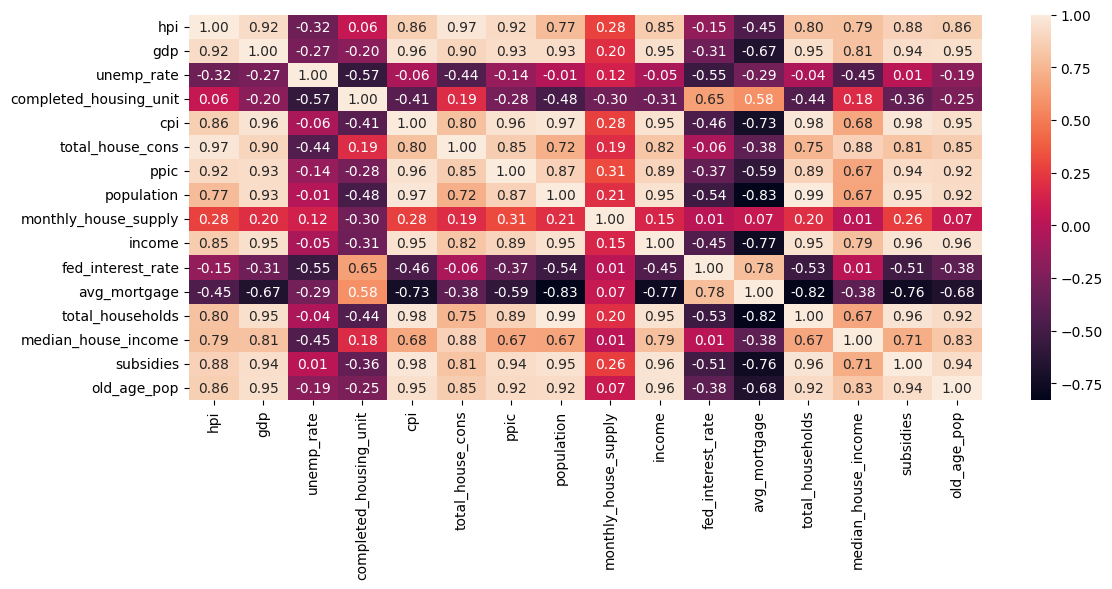

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

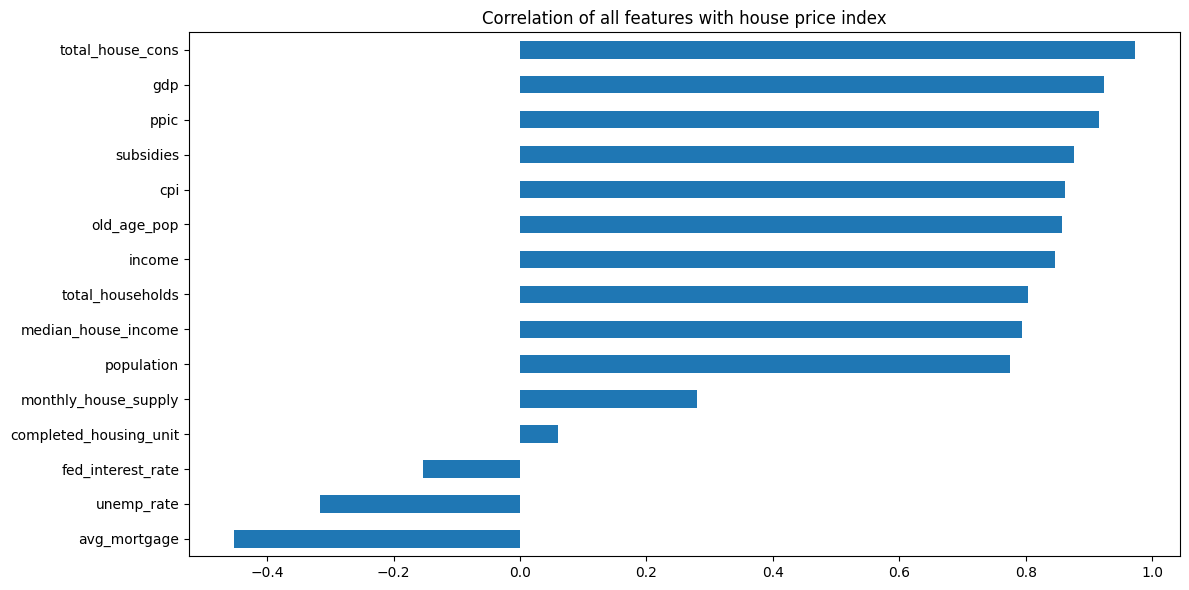

In [ ]:
plt.figure(figsize = (12,6))
df.corr()['hpi'].sort_values()[:-1].plot(kind='barh')
plt.title("Correlation of all features with house price index")
plt.tight_layout()
plt.show()

> **Low Correlation** : monthly_house_supply(0.28), completed_housing_unit(0.06), fed_interest_rate(-0.15), unemp_rate(-0.32), avg_mortgage(-0.45)









Time Series Analysis

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<function matplotlib.pyplot.show(close=None, block=None)>

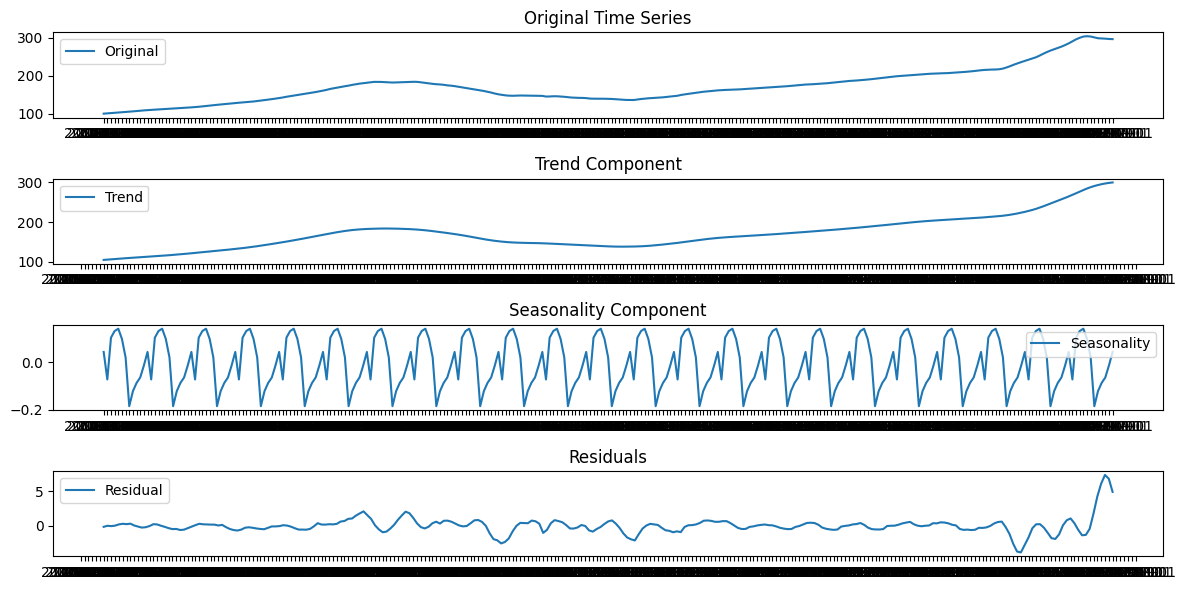

In [ ]:
decompose = seasonal_decompose(df['hpi'], model='additive', period= 12)
trend_df = decompose.trend
seasonal_df = decompose.seasonal
residual = decompose.resid

plt.figure(figsize = (12,6))

plt.subplot(4, 1, 1)
plt.plot(df['hpi'], label='Original')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend_df, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal_df, label='Seasonality')
plt.legend()
plt.title('Seasonality Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show

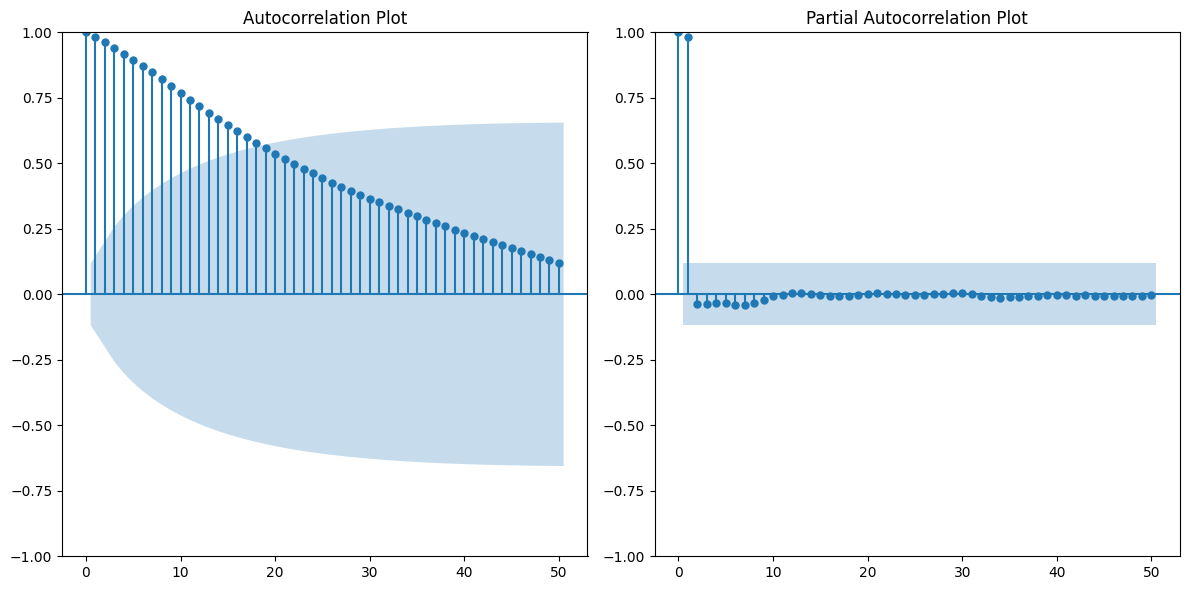

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plot_acf(df['hpi'], lags= 50, ax= plt.gca(), title= "Autocorrelation Plot")


plt.subplot(1,2,2)
plot_pacf(df['hpi'], lags= 50, ax=plt.gca(), title= "Partial Autocorrelation Plot")

plt.tight_layout()
plt.show()

Visualization

###### Using the data to understand its distribution through various plots and graphs

**Pairplot for visualizing relationships**







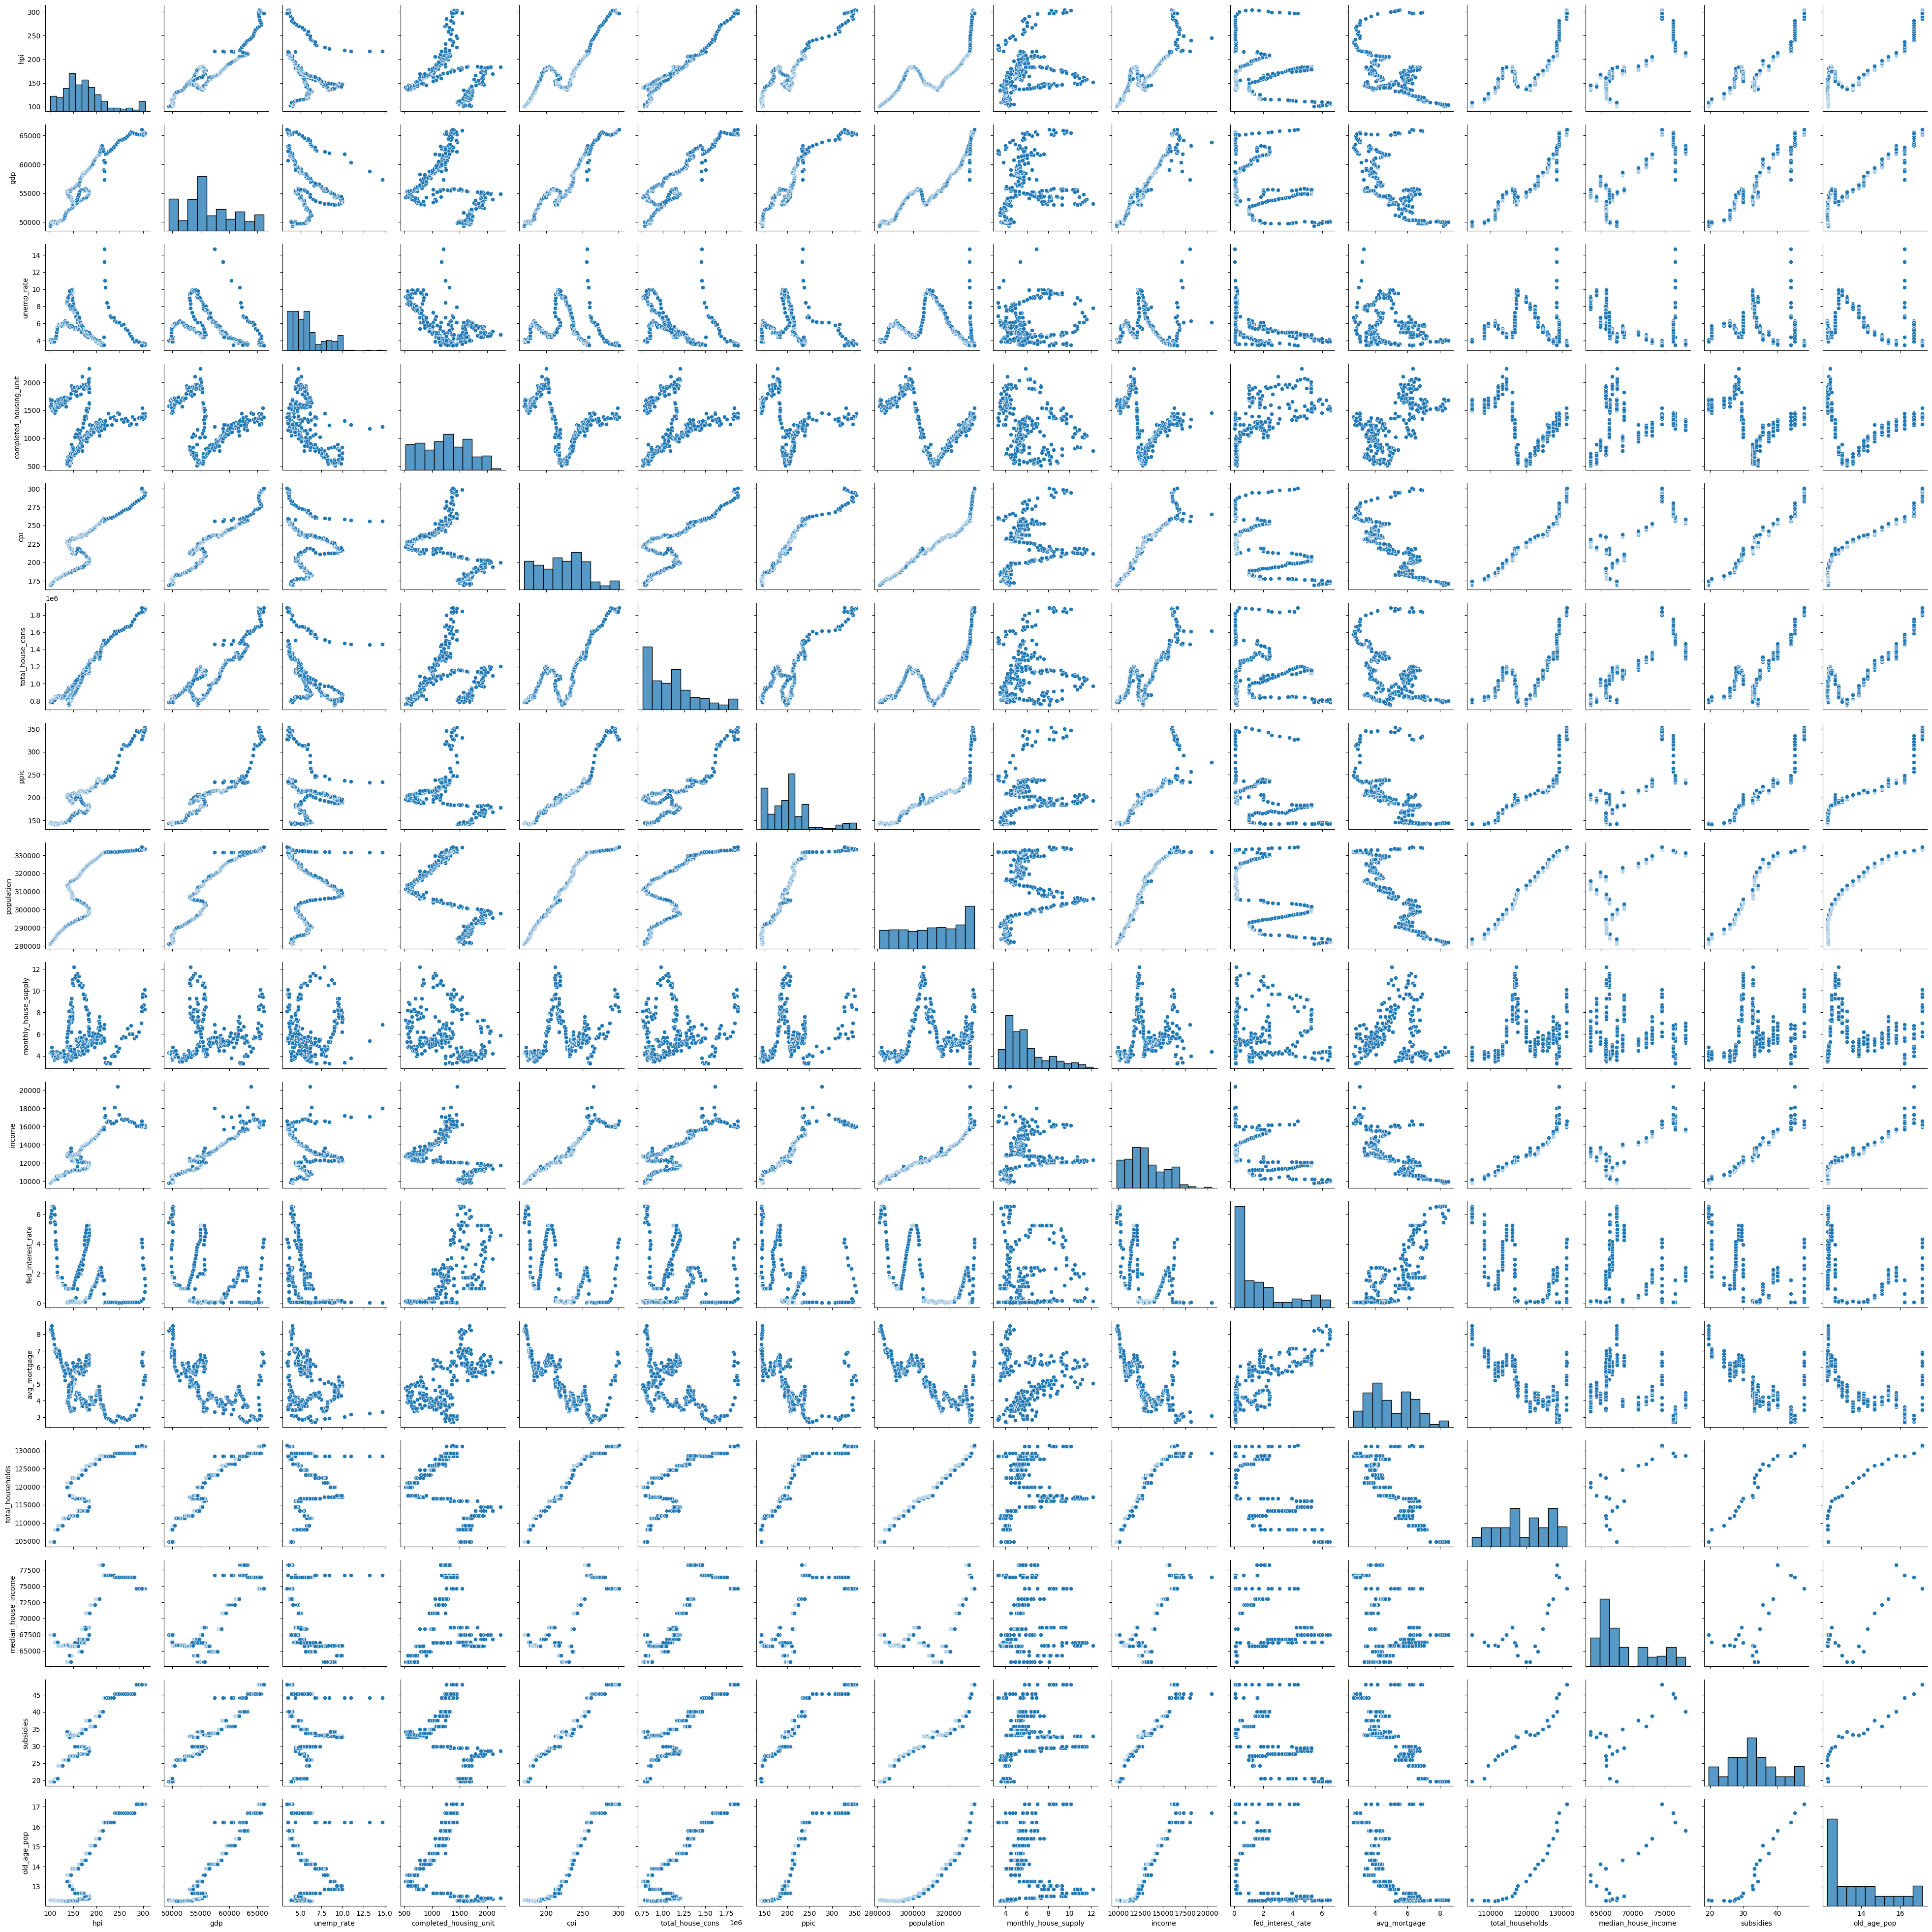

In [ ]:
sns.pairplot(df)

**Histogram to understand data distribution**

<Figure size 1300x600 with 0 Axes>

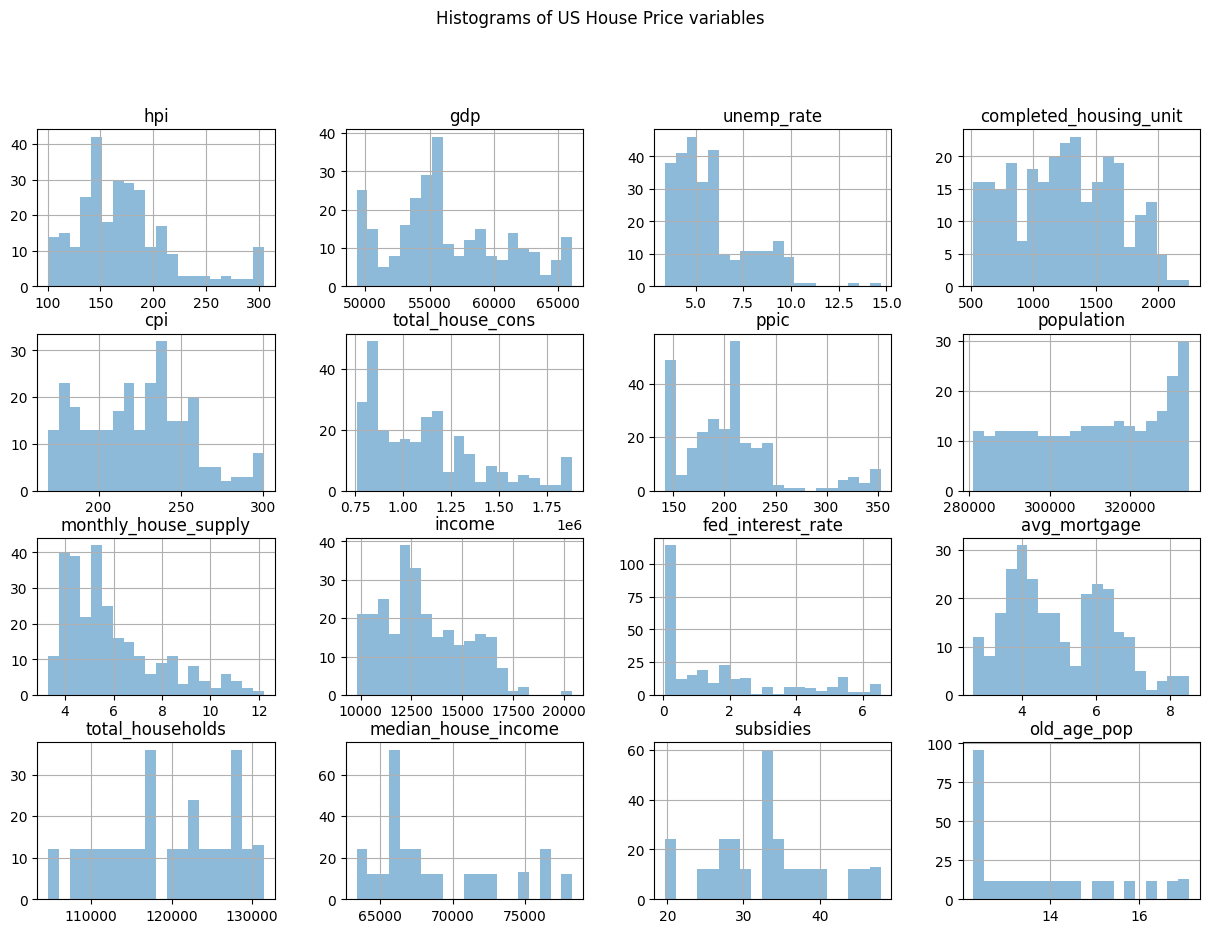

In [ ]:

plt.figure(figsize=(13, 6))
df.hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms of US House Price variables', y=1.0)
plt.show()

**Boxplot for checking outliers**

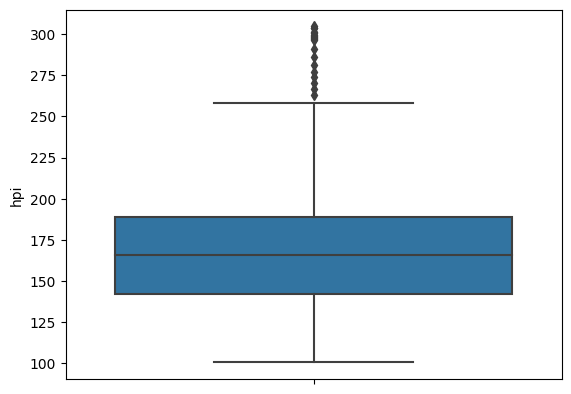

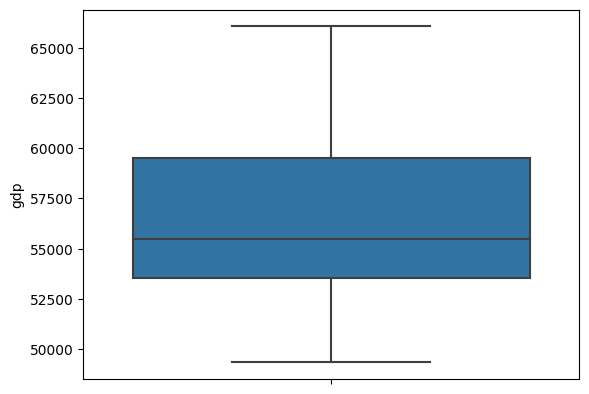

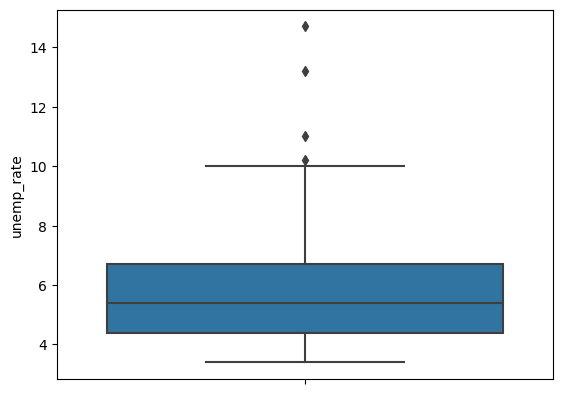

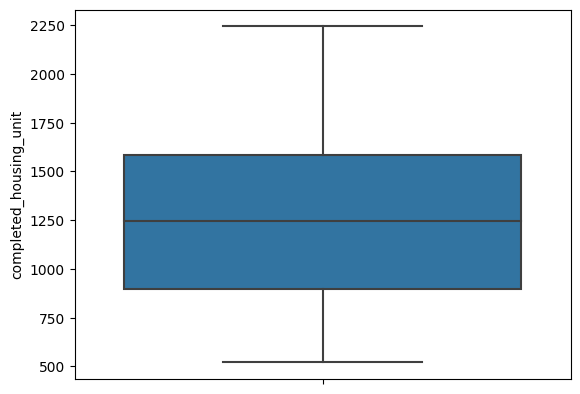

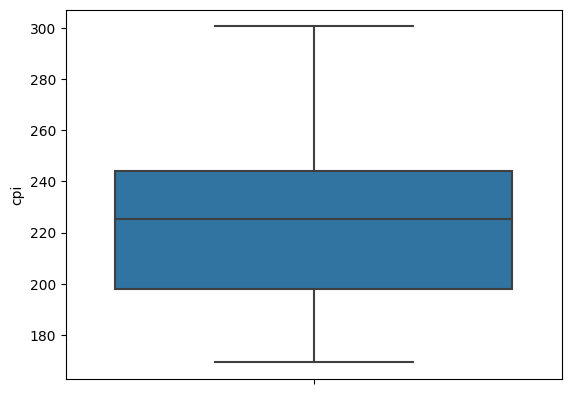

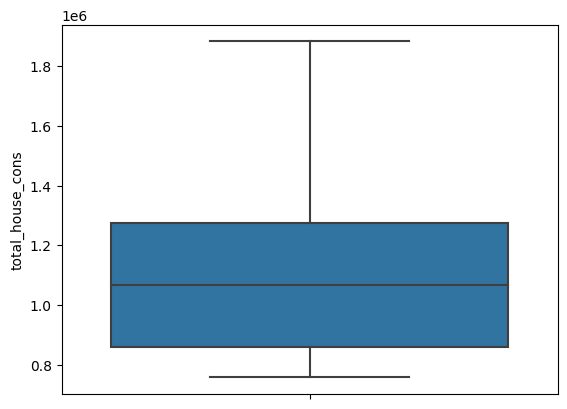

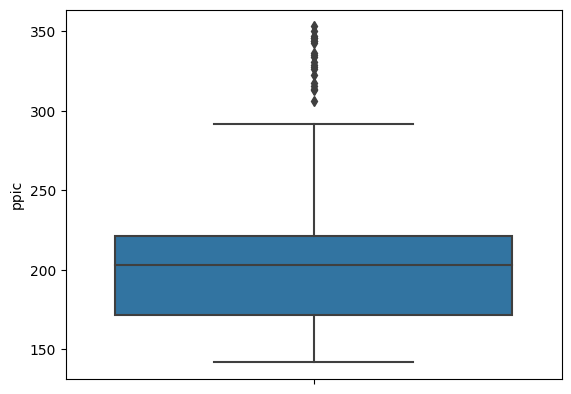

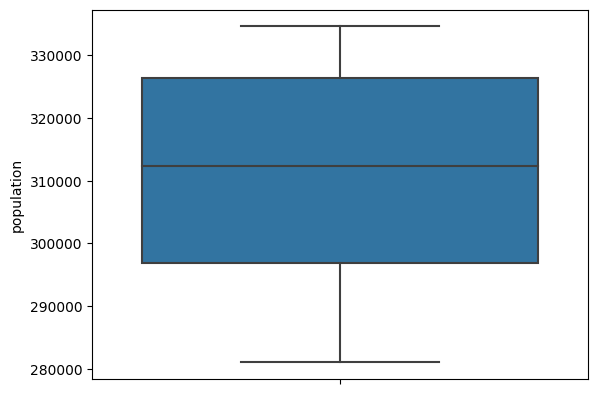

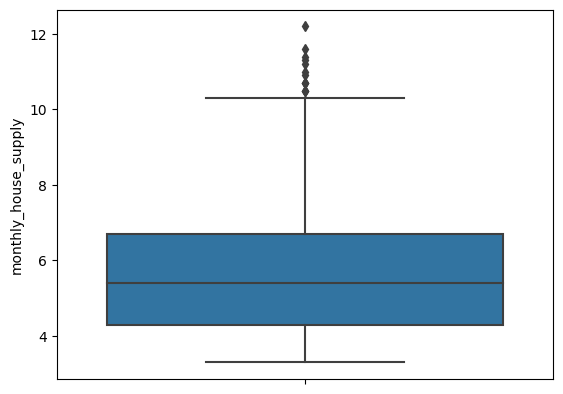

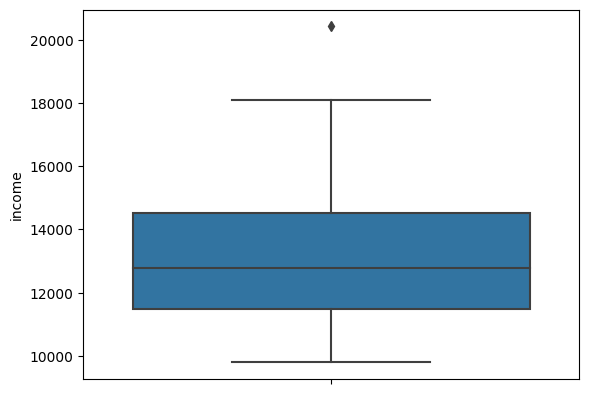

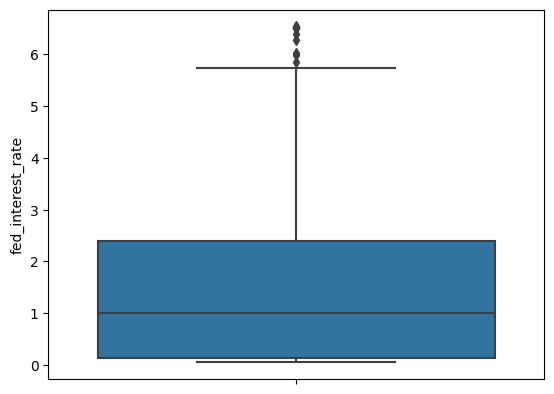

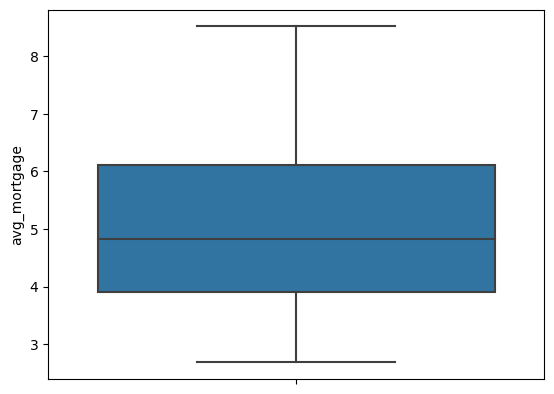

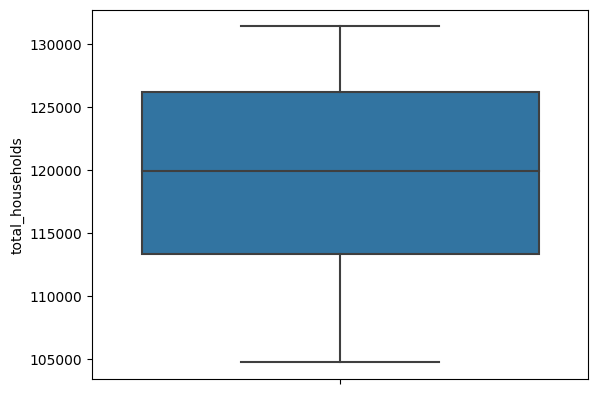

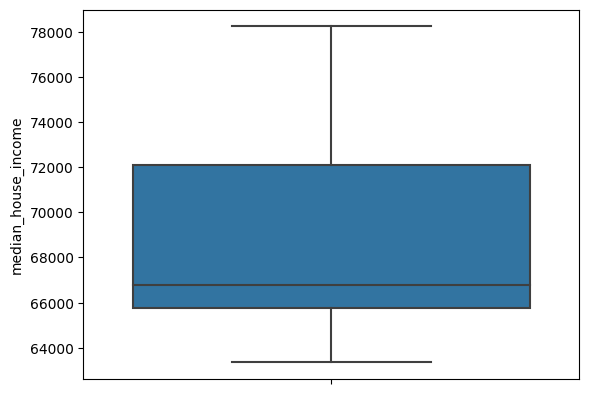

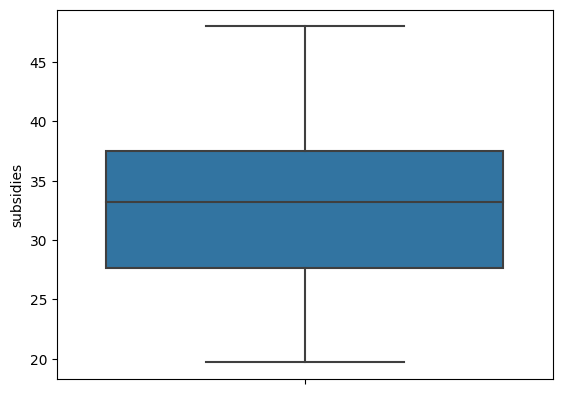

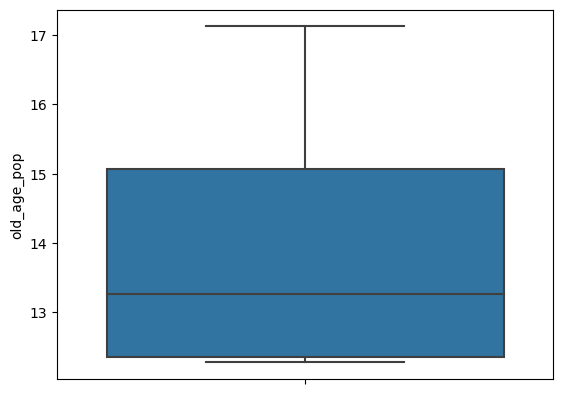

In [ ]:
for i in df.columns:
  sns.boxplot(y = i, data= df)
  plt.show()
  print('')

**Scatter plot between target and variables**

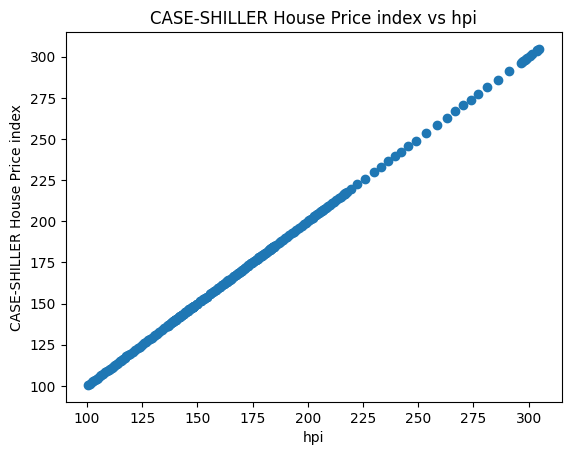

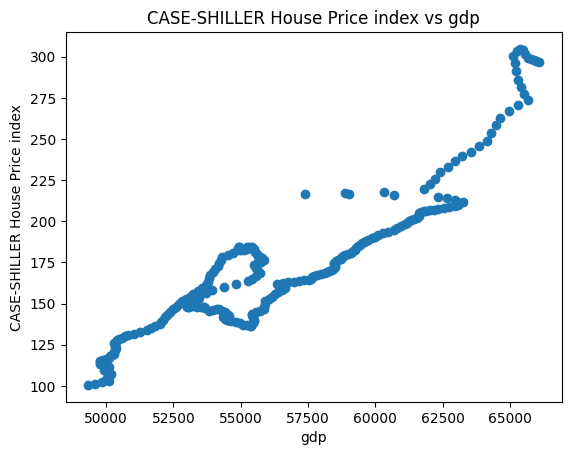

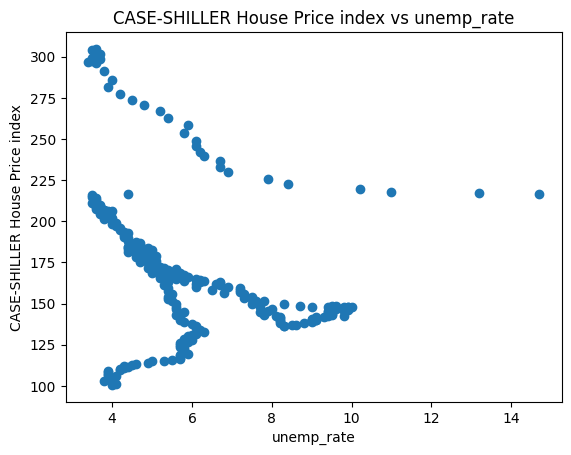

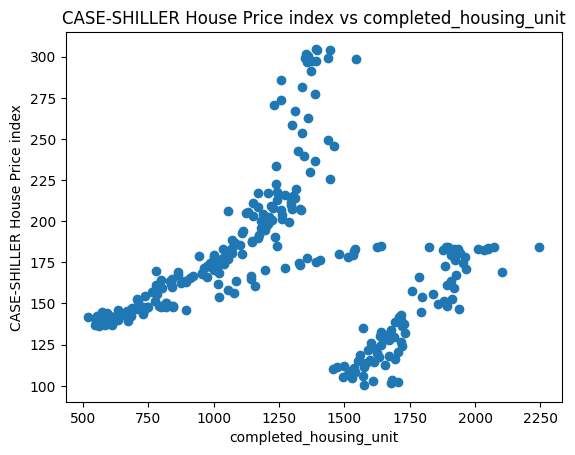

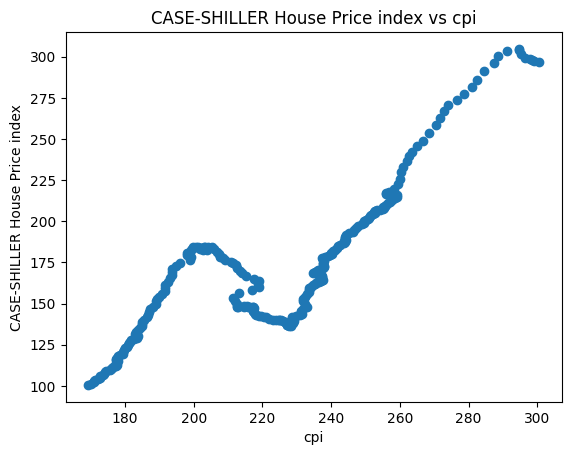

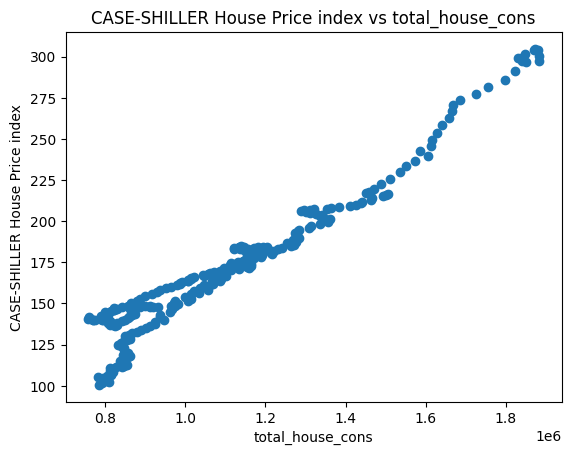

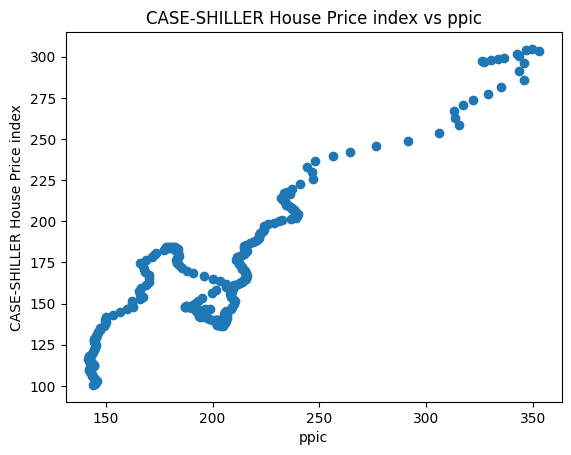

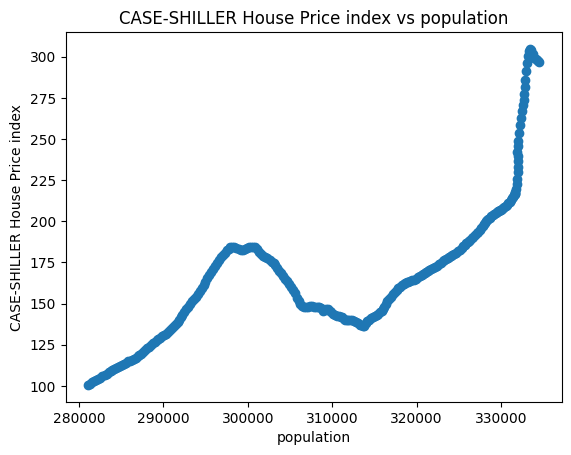

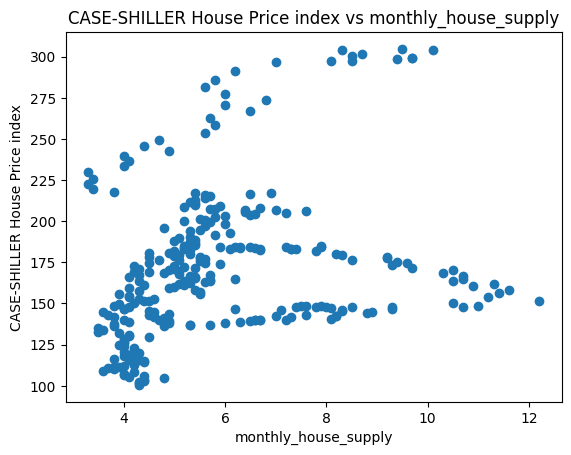

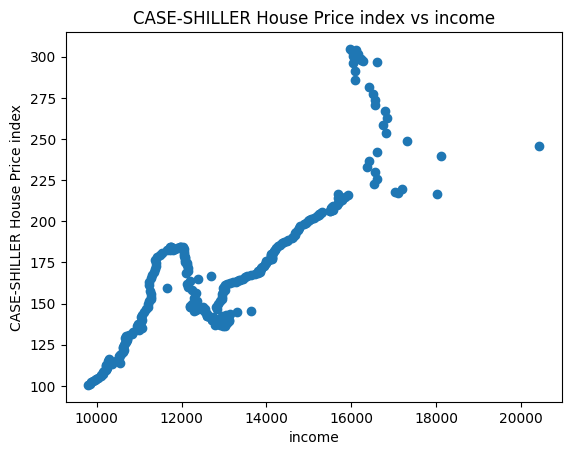

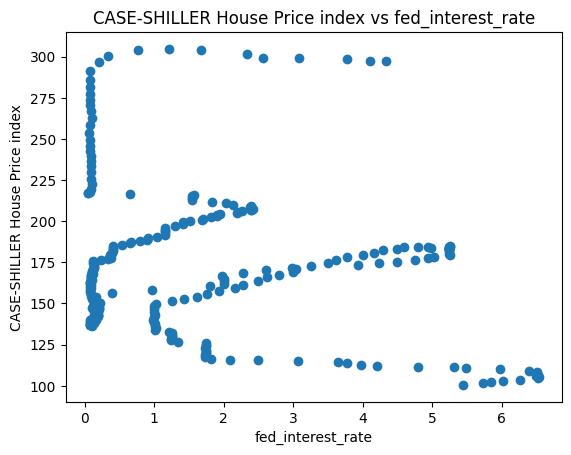

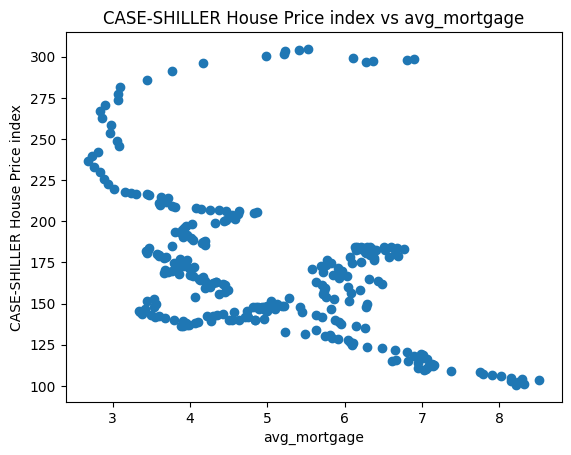

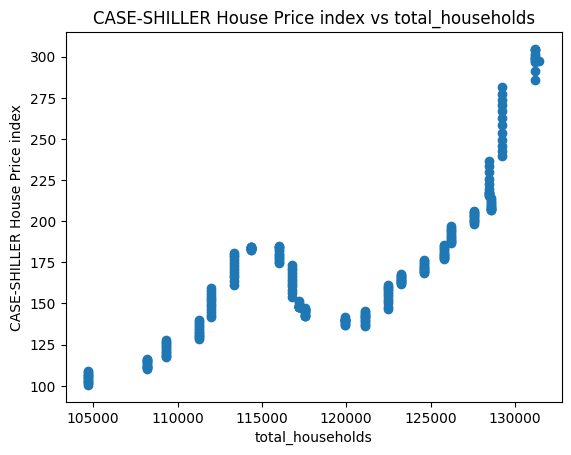

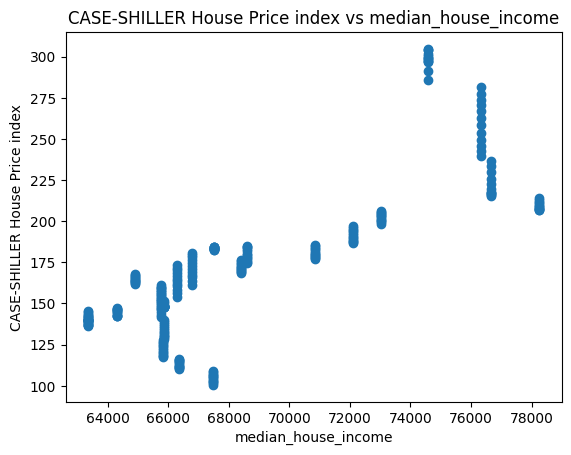

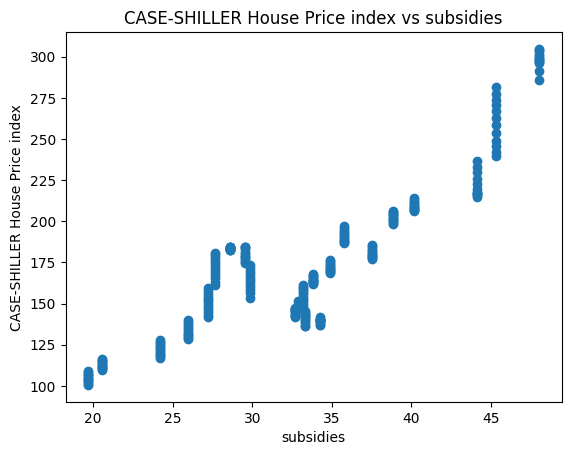

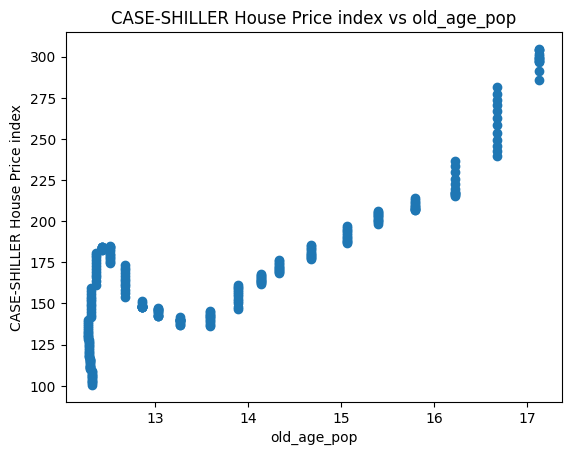

In [ ]:
for feature in df.columns:
    plt.figure()
    plt.scatter(x = df[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER House Price index")
    plt.title(f"CASE-SHILLER House Price index vs {feature}")

Extract features and target

In [ ]:
X= df.drop('hpi', axis=1)
y= df['hpi']

Checking for multicollinearity within features using Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
considered_features = ['unemp_rate', 'completed_housing_unit','monthly_house_supply',
                       'fed_interest_rate', 'avg_mortgage']

compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
3       fed_interest_rate  3.765116
4            avg_mortgage  3.158772
1  completed_housing_unit  2.550338
0              unemp_rate  1.858709
2    monthly_house_supply  1.232176

As VIF of variable is less than 5, variables are not removed from dataframe.

Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state= 32)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(221, 15)
(221,)
(56, 15)
(56,)


In [ ]:
#Standardizing features
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [ ]:
#Models
reg_models = {
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

In [ ]:
best_model = None
best_mse = float('inf')

#Training and Evaluation
for i, (name, model) in enumerate(reg_models.items()):
  model.fit(X_train_ss, y_train)
  y_pred = model.predict(X_test_ss)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)


  print(f"Model :{name}")
  print(f"Mean Squared Error :{mse}")
  print(f"R-squared :{r2}")
  print()

  #update model if current model gives lower MSE
  if mse < best_mse:
        best_mse = mse
        best_model = model

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

Model :Lasso
Mean Squared Error :40.38035765502429
R-squared :0.9842163657616219

Model :Ridge
Mean Squared Error :10.448850742800403
R-squared :0.9959158153143488

Model :Random Forest
Mean Squared Error :2.2525121515571995
R-squared :0.9991195514358389

Model :Gradient Boosting
Mean Squared Error :3.6829685918927955
R-squared :0.9985604231229824

Model :XGBoost
Mean Squared Error :4.535508658771665
R-squared :0.9982271873278927


Best Model: RandomForestRegressor with MSE: 2.2525121515571995


In [ ]:
best_mse_train = float('inf')
best_mse_test = float('inf')

##Making predictions for test and train sets
for i, (name, model) in enumerate(reg_models.items()):
  y_pred_train_l = model.predict(X_train_ss)
  y_pred_test_l = model.predict(X_test_ss)

  ##R2 score for Lasso Regression Model
  r2_score_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
  r2_score_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

  ##Check the mean squared error (MSE) for Lasso Regression Model
  mse_train = mean_squared_error(y_train, y_pred_train_l)
  mse_test = mean_squared_error(y_test, y_pred_test_l)

  print(f"\nModel :{name}")
  print(f"For Train Set:\nR2 score:{r2_score_train}")
  print(f"MSE score: {mse_train}")
  print(f"\nFor Test Set:\nR2 score:{r2_score_test}")
  print(f"MSE score: {mse_test}")

  if mse_train < best_mse_train :
    if mse_test < best_mse_test:
      best_mse_test = mse_test
      best_model = model

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse_test}")



Model :Lasso
For Train Set:
R2 score:0.9800025804078095
MSE score: 38.25429554577561

For Test Set:
R2 score:0.9842163657616219
MSE score: 40.38035765502429

Model :Ridge
For Train Set:
R2 score:0.9940178565959518
MSE score: 11.443610547884965

For Test Set:
R2 score:0.9959158153143488
MSE score: 10.448850742800403

Model :Random Forest
For Train Set:
R2 score:0.9998219816448222
MSE score: 0.3405422754746695

For Test Set:
R2 score:0.9991195514358389
MSE score: 2.2525121515571995

Model :Gradient Boosting
For Train Set:
R2 score:0.9998627414322233
MSE score: 0.26257036782745213

For Test Set:
R2 score:0.9985604231229824
MSE score: 3.6829685918927955

Model :XGBoost
For Train Set:
R2 score:0.9999999434227093
MSE score: 0.00010823018397119578

For Test Set:
R2 score:0.9982271873278927
MSE score: 4.535508658771665

Best Model: RandomForestRegressor with MSE: 2.2525121515571995


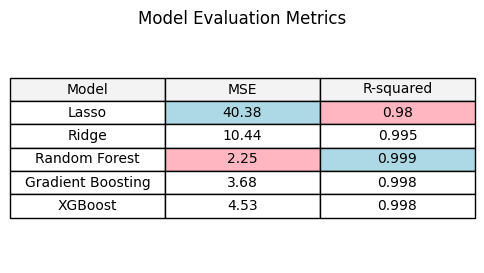

In [ ]:
data = {
    'Model': ['Lasso', 'Ridge', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'MSE': [40.38, 10.44, 2.25, 3.68, 4.53],
    'R-squared': [0.98, 0.995, 0.999, 0.998, 0.998]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3))

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.0, 1.4)  # Adjust the table size if needed

# Highlight minimum and maximum MSE
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffb6c1' if i == min_mse_index else '#add8e6'  # light pink for min and light blue for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffb6c1' if i == min_r2_index else '#add8e6'  # Light pink for min and light blue for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()


**Random Forest** gives the lowest MSE value and high R-squared value among all models.Additionally, **Random Forest** performed well in both training and testing data making it best model based on provided metrics

**Feature Importance :** Understanding features is crucial for gaining insights about the domain,to make informed decision, model building, driving predictions and interpreting the prediction in the real world.

Feature Analysis helps in driving the factor transparency for predictions. In my analysis, features influencing the House Price prediction were "Gross Domestic Product of the US national(gdp)", "Producer Price Index of Commodity(ppic)", "Income", "CPI", "median household income", "population" identified as influential.

Changes in these features would impact the House Price Index.Additionally, "fed_interest_rate", "unemp_rate", "avg_mortgage rate" would impact House price in negative manner.
